In [30]:
import time
import numpy as np
from pyspark import SparkConf, SparkContext

def cal_PriceChangePercentage(filename: str):
    data = sc.textFile(filename)
    header = data.first()
    data = data.filter(lambda row : row != header)
    data = data.map(
        lambda x : x.split(",")
    ).map(
        lambda x : (time.mktime(time.strptime(x[0], "%Y-%m-%d")), (x[0], float(x[3])))
    )
    cnt = data.count()
    res = data.values().values().collect()
    first_price = res[0]
    highest_price = max(res)
    idx = 0

    while first_price == 0:
        idx += 1
        first_price = res[idx]

    return round((highest_price - first_price) / first_price * 100, 2)

Processing files: 100%|███████████████████████| 299/299 [01:02<00:00,  4.79it/s]


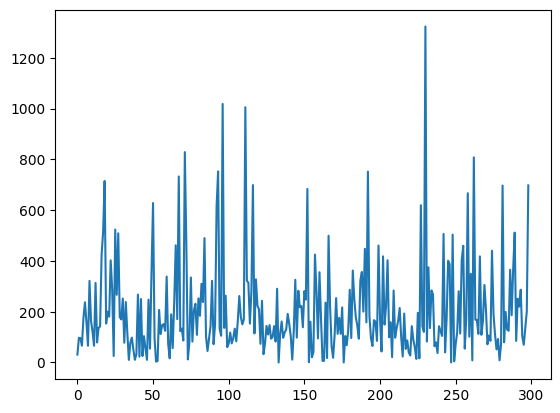

In [31]:
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

file_list = os.listdir("/home/jkx/stockdata")

x = np.arange(0, len(file_list))
y = []

for file in tqdm(file_list, "Processing files"):
    filename = "file:///home/jkx/stockdata/" + file
    y.append(cal_PriceChangePercentage(filename))


plt.plot(x, y)
plt.show()

In [33]:
max_value = max(y)
max_idx = [i for i in range(len(y)) if i == y.index(max_value)]

min_value = min(y)
min_idx = [i for i in range(len(y)) if i == y.index(min_value)]

for idx in max_idx:
    print(f"file with the maximum increase: {file_list[idx]}, percentage: {max_value} %")

for idx in min_idx:
    print(f"file with the minimum decrease: {file_list[idx]}, percentage: {min_value} %")

file with the maximum increase: 600446.csv, percentage: 1323.07 %
file with the minimum decrease: 001979.csv, percentage: 0.0 %
